# Starter Notebook

Use this notebook as a starting point for using the library.

## setup access token

We're using dotenv library here, alternatively you can simply set the environment variable as:
```
import os
os.environ["CODE_GENIE_TOKEN"] = "your-access-token-here"
```

Though it is not recommended to do so as notebooks are typically shared with others and you should keep your access token private.

In [2]:
from dotenv import load_dotenv

In [3]:
load_dotenv("../.env")  # replace with path to your env file

True

## Create data

while you should import your own dataset, we can use code-genie to generate the data for this analysis

In [4]:
from code_genie import Genie, PandasGenie

In [5]:
data_gen = Genie(inputs=[],
                 instructions=["generate a pandas dataframe containing 100 rows with employee information with following columns:",
                               "id: random employee id",
                               "name: employee name",
                               "salary: salary per annum in USD",
                               "department: should be either engineering or product"])

In [6]:
print(data_gen.code)

import pandas as pd
import numpy as np

def generate_employee_df():
    
    # Generate random employee IDs
    ids = np.random.randint(1000, 9999, 100)
    
    # Generate random employee names
    first_names = ['John', 'Jane', 'Sam', 'Samantha', 'William', 'Liam', 'Emma', 'Olivia']
    last_names = ['Smith', 'Johnson', 'Brown', 'Garcia', 'Miller', 'Davis', 'Wilson', 'Lopez']
    names = []
    for i in range(100):
        name = np.random.choice(first_names) + ' ' + np.random.choice(last_names)
        names.append(name)
    
    # Generate random employee salaries
    salaries = np.random.randint(50000, 250000, 100)
    
    # Generate random department assignments
    departments = np.random.choice(['engineering', 'product'], 100)
    
    # Create the DataFrame
    employee_df = pd.DataFrame({'ID': ids,
                                'Name': names,
                                'Salary': salaries,
                                'Department': departments})
    
    return empl

In [7]:
df = data_gen()
df.shape

(100, 4)

In [8]:
df.head()

,ID,Name,Salary,Department
0,4554,Olivia Garcia,111675,engineering
1,5812,Emma Lopez,97897,engineering
2,9191,William Wilson,88243,product
3,9156,William Miller,113960,product
4,5926,Sam Davis,166372,product


### add missing values

In [9]:
data_gen_add_missing = PandasGenie("make salaries for around 10% of the employees missing",
                                   columns=list(df.columns))

In [10]:
print(data_gen_add_missing.code)

import numpy as np
import pandas as pd

def add_missing_salaries(df):
    # get 10% of rows as integer
    num_missing = int(len(df)*0.1)
    # get list of random indices to set to NaN
    random_indices = np.random.choice(df.index, num_missing, replace=False)
    # set the chosen indices' salaries to NaN
    df.loc[random_indices, 'Salary'] = np.nan
    # return the updated dataframe
    return df



In [11]:
df_missing = data_gen_add_missing(df)

In [13]:
df_missing["Salary"].isnull().sum()

10

## Analyze data

### find number of missing values in each column

In [14]:
num_missing = PandasGenie("find number of missing values in each column")
print(num_missing.code)

import pandas as pd

def find_missing_values(df):
    num_missing = df.isna().sum()
    return num_missing



In [15]:
num_missing(df_missing)

ID             0
Name           0
Salary        10
Department     0
dtype: int64

### plot distribution of salary

In [21]:
dist_salary = PandasGenie("plot distribution of salary, create bins of 10K each", columns=df_missing.columns)

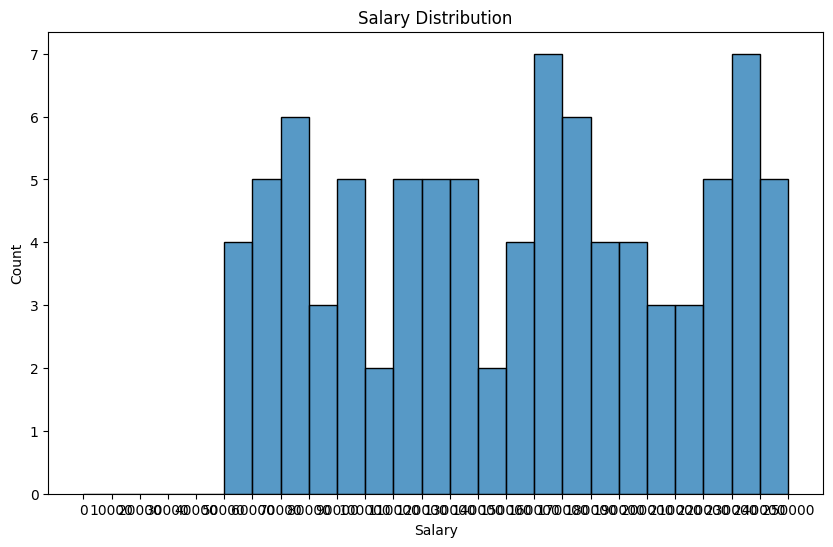

In [22]:
dist_salary(df_missing)

In [23]:
dept_salary = PandasGenie("make boxplots of salary grouped by department", columns=df_missing.columns)

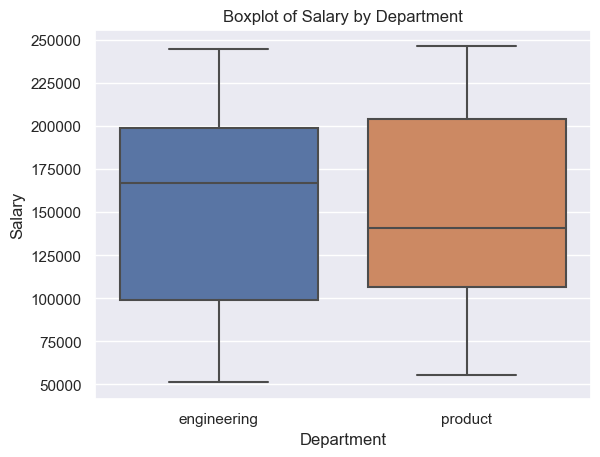

In [24]:
dept_salary(df_missing)

In [25]:
dept_100k = PandasGenie("how many people in each department make more than 100K?", columns=df_missing.columns)

In [26]:
dept_100k(df_missing)

Department
engineering    34
product        33
Name: ID, dtype: int64